In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

Let us now understand how the gamma parameter works. For that, we will look at a different dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

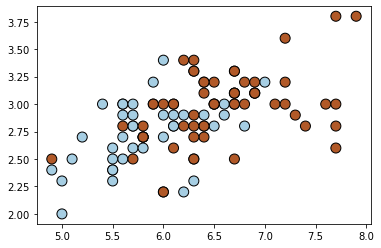

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)

In [4]:
from sklearn import svm

In [5]:
def plot_contour(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

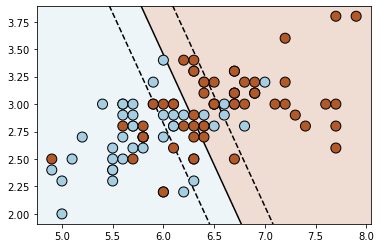

In [10]:
# Fit linear SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
plot_contour(clf, X, y)

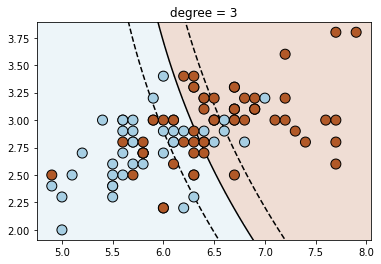

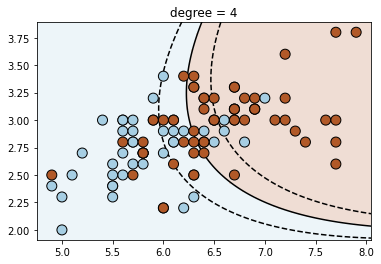

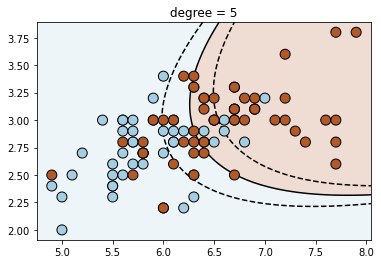

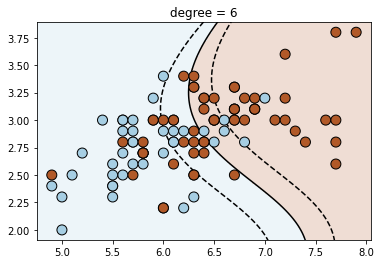

In [11]:
# Fit polynomial SVM of degree 2, 3, 4

for degree in range(3, 7):
    clf = svm.SVC(kernel='poly', degree=degree)
    clf.fit(X, y)
    plt.figure()
    plt.title('degree = {}'.format(degree))
    plot_contour(clf, X, y)

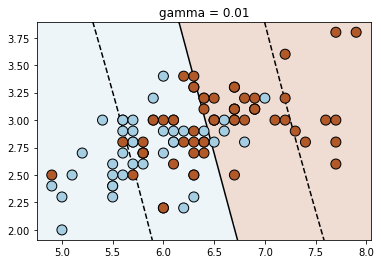

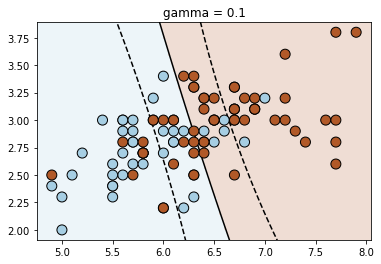

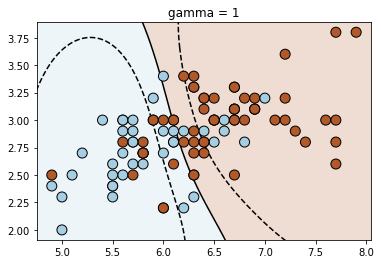

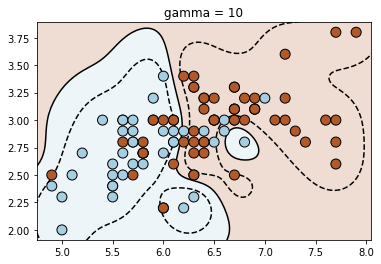

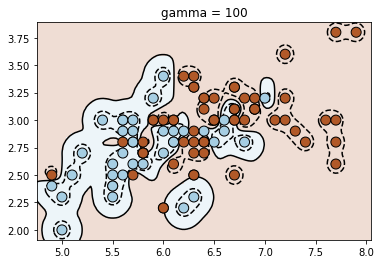

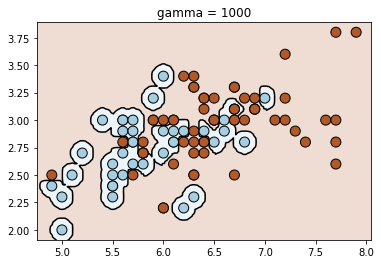

In [12]:
X_train = X
y_train = y
kernel = 'rbf'
# Store kernel matrix
kms = []
for fig_num, gamma in enumerate([0.01, 0.1, 1, 10, 100, 1000]):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
 
    plt.title("gamma = {}".format(gamma))
    plot_contour(clf, X_train, y_train)